In [19]:
this.dir <- '' # set to current working directory
setwd(this.dir)

results <- read.csv("results-final.csv",header=TRUE)
summary(subset(results,select=-best_params),maxsum=20)


ERROR: Error in dirname(parent.frame(2)$ofile): a character vector argument expected


In [14]:
# reorder
order = matrix(c("eplex-1m","xgboost","gradboost","mlp","rf","eplex","kernel-ridge","mrgp","adaboost","afp","lasso-lars","linear-svr","linear-regression","sgd-regression","gsgp"))
results$algorithm = factor(results$algorithm,levels = order)


     algorithm       N          mse_rank            sd              se         
 eplex-1m :1   Min.   :940   Min.   : 3.380   Min.   :2.576   Min.   :0.08403  
 xgboost  :1   1st Qu.:940   1st Qu.: 5.694   1st Qu.:2.837   1st Qu.:0.09253  
 gradboost:1   Median :940   Median : 7.210   Median :2.957   Median :0.09646  
 mlp      :1   Mean   :940   Mean   : 7.550   Mean   :3.306   Mean   :0.10784  
 rf       :1   3rd Qu.:940   3rd Qu.:10.130   3rd Qu.:3.525   3rd Qu.:0.11499  
 eplex    :1   Max.   :940   Max.   :11.997   Max.   :5.782   Max.   :0.18858  
 (Other)  :9                                                                   
       ci        
 Min.   :0.1649  
 1st Qu.:0.1816  
 Median :0.1893  
 Mean   :0.2116  
 3rd Qu.:0.2257  
 Max.   :0.3701  
                 

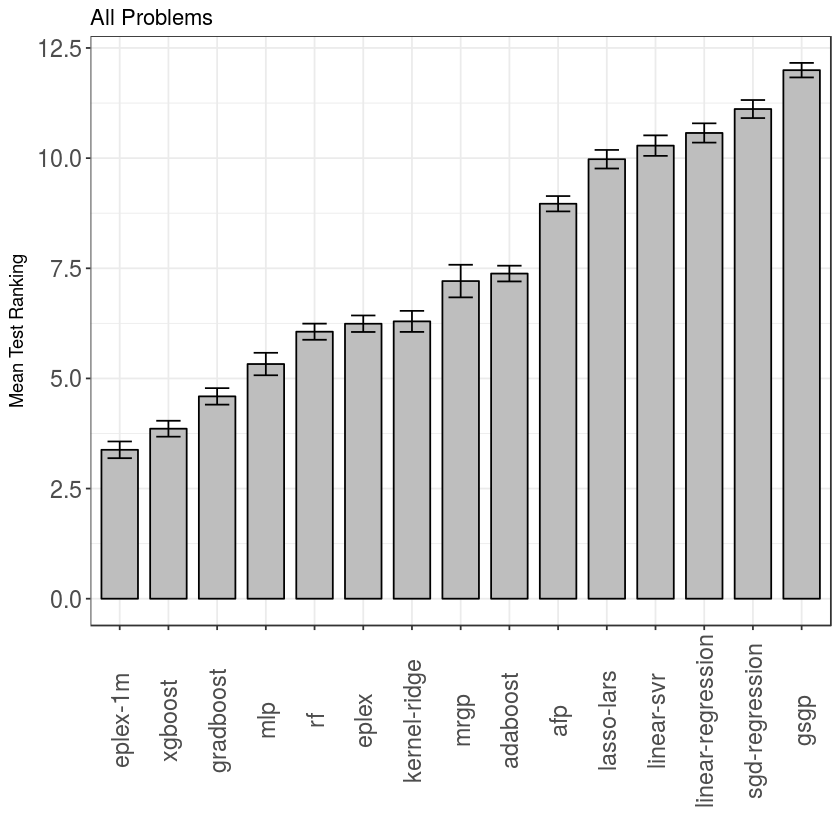

In [17]:

# get rankings
source('summarySE.R')
results$ave_test_mse <- ave(results$test_mse, results$dataset,results$algorithm, FUN = median)
results$mse_rank <- ave(results$ave_test_mse, results$dataset, FUN = function(x) rank(x, ties.method = "average"))/10
mse_rank_mean <- summarySE(results, measurevar="mse_rank", groupvars=c("algorithm"))
summary(mse_rank_mean)
rank_stats <- summarySE(results, measurevar="mse_rank", groupvars=c("dataset","algorithm"))
library(ggplot2)

(fig <- ggplot(mse_rank_mean,aes(x=algorithm,y=mse_rank, fill=algorithm)) 
        + geom_bar(stat = "summary",fun.y="mean",
               position=position_dodge(width=0.75), colour="black",fill="grey",width=0.75)
        + geom_errorbar(aes(ymin=mse_rank-ci, ymax=mse_rank+ci),position=position_dodge(width=0.75),
                   width=0.5)+theme_bw()
        + theme(legend.position="none",legend.title=element_blank(),
           axis.text.x=element_text(angle=90,vjust=0.5,size=14),axis.text.y=element_text(size=14))
        + labs(y="Mean Test Ranking",x="")
        + labs(title="All Problems"))

In [18]:
# run friedman test
rank_stats$dataset = factor(rank_stats$dataset)
rank_stats$algorithm = factor(rank_stats$algorithm)
friedman.test(mse_rank ~ algorithm | dataset, rank_stats)



	Friedman rank sum test

data:  mse_rank and algorithm and dataset
Friedman chi-squared = 504.41, df = 14, p-value < 2.2e-16


Loading required package: coin
Loading required package: survival
Loading required package: multcomp
Loading required package: mvtnorm
Loading required package: TH.data
Loading required package: MASS

Attaching package: ‘TH.data’

The following object is masked from ‘package:MASS’:

    geyser

Loading required package: colorspace


$Friedman.Test

	Asymptotic General Symmetry Test

data:  mse_rank by
	 algorithm (eplex-1m, xgboost, gradboost, mlp, rf, eplex, mrgp, kernel-ridge, adaboost, afp, lasso-lars, linear-svr, linear-regression, sgd-regression, gsgp) 
	 stratified by dataset
maxT = 13.21, p-value < 2.2e-16
alternative hypothesis: two.sided


$PostHoc.Test
                                               
xgboost - eplex-1m                 9.999916e-01
gradboost - eplex-1m               8.729748e-01
mlp - eplex-1m                     1.592398e-01
rf - eplex-1m                      3.780719e-03
eplex - eplex-1m                   1.060776e-03
mrgp - eplex-1m                    3.040604e-07
kernel-ridge - eplex-1m            7.761615e-04
adaboost - eplex-1m                2.760068e-08
afp - eplex-1m                     7.771561e-16
lasso-lars - eplex-1m              0.000000e+00
linear-svr - eplex-1m              0.000000e+00
linear-regression - eplex-1m       0.000000e+00
sgd-regression - eplex-1m          0.000

$Friedman.Test

	Asymptotic General Symmetry Test

data:  mse_rank by
	 algorithm (eplex-1m, xgboost, gradboost, mlp, rf, eplex, mrgp, kernel-ridge, adaboost, afp, lasso-lars, linear-svr, linear-regression, sgd-regression, gsgp) 
	 stratified by dataset
maxT = 13.21, p-value < 2.2e-16
alternative hypothesis: two.sided


$PostHoc.Test
                                               
xgboost - eplex-1m                 9.999916e-01
gradboost - eplex-1m               8.729748e-01
mlp - eplex-1m                     1.592398e-01
rf - eplex-1m                      3.780719e-03
eplex - eplex-1m                   1.060776e-03
mrgp - eplex-1m                    3.040604e-07
kernel-ridge - eplex-1m            7.761615e-04
adaboost - eplex-1m                2.760068e-08
afp - eplex-1m                     7.771561e-16
lasso-lars - eplex-1m              0.000000e+00
linear-svr - eplex-1m              0.000000e+00
linear-regression - eplex-1m       0.000000e+00
sgd-regression - eplex-1m          0.000

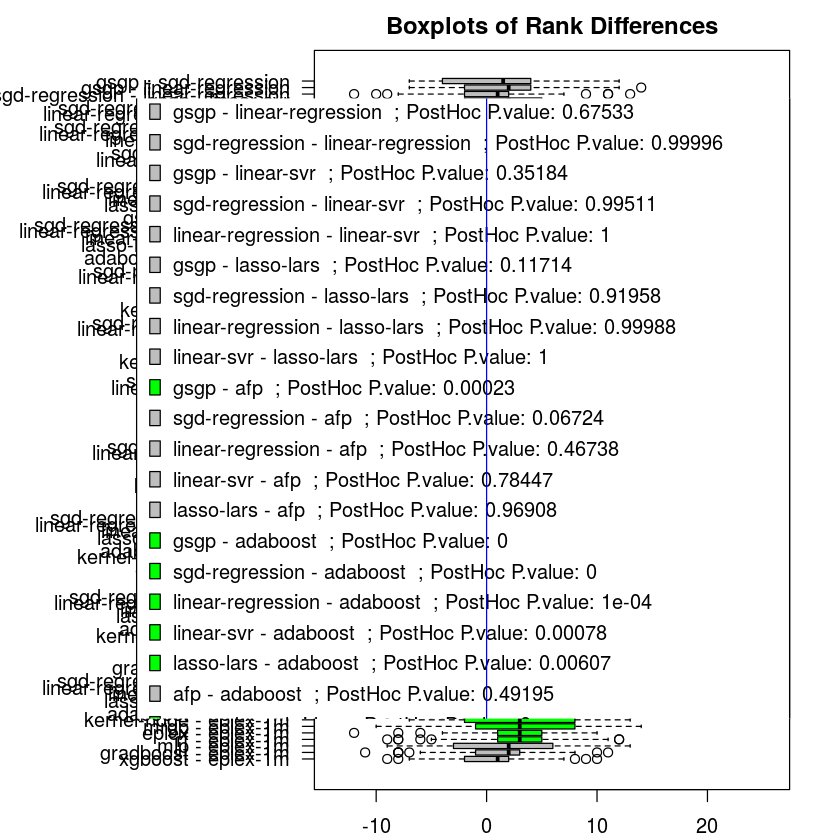

In [8]:
# run post-hoc friedman test
source('friedman.r')

friedman.test.with.post.hoc(mse_rank ~ algorithm | dataset, rank_stats,to.plot.parallel = F)